In [63]:
#la constante del grupo es el momento angular? en spines xd
#las matrices de dirac, dos son de materia y dos de antimateria y se relacionan con la propiedad de anticonmutacion

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from IPython.display import clear_output
import time

In [65]:
sigm = lambda x: 1/(1+np.exp(-x))

In [66]:
class Layer:
    #numero de neuronas NN
    #NC num de conexiones
    def __init__(self,NC,NN,ActFunc):
        
        self.NC = NC
        self.NN = NN
        self.ActFunc = ActFunc
        
        #los pesos se inicializan en random porque si concieramos los pesos la red no aprenderia
        self.W = np.random.uniform(-10,10,size=(self.NC,self.NN)) #pesos
        self.b = np.random.uniform(-10,10,size=(1,self.NN)) #bias/corte de la linea
        #dicho modelo es lineal y de pocas neuronas
        
    def Activation(self,x):
        #multiplico estimulo por el vector dada la funcion de activacion
        z = np.dot(x,self.W)+ self.b
        return self.ActFunc(z)[0]
    
    #vamos a hacer una mutacion variando pesos y bias pero con la normal y la desviacion estandar define la mutuacion
    #loc es media de la normal
    def Mutate(self):
        self.W += np.random.normal( loc=0.,scale=0.05,size=(self.NC,self.NN) )
        self.b += np.random.normal( loc=0.,scale=0.05,size=(1,self.NN) )
        
    #crear un perceptron con mas de una capa

In [67]:
L0 = Layer(2,4,sigm)
L0.W

array([[-5.81463581, -2.96198263, -6.01598455,  9.14046045],
       [-5.9175158 ,  8.7593576 , -1.86715871,  5.78727556]])

In [68]:
#Son de espacio r2
L0.b

array([[-1.40083241,  8.64760756,  3.37575629,  7.8681652 ]])

In [69]:
#con una sola capa
x = [0.1,0.5]
L0.Activation(x)

array([0.00709634, 0.99999704, 0.86301711, 0.9999915 ])

In [70]:
#si mutamos la capa la funcion de activacion cambia, y hace que cambie el comportamiento de la red, lo que hace que aprenda
L0.Mutate()
L0.Activation(x)

array([0.00725892, 0.9999968 , 0.87035412, 0.9999902 ])

In [71]:
#con capas ocultas es deep learning, es dificil de entrenar con evolucion
#red neuronal
l0 = Layer(2,4,sigm)
l1 = Layer(4,10,sigm)
l2 = Layer(10,5,sigm)
l3 = Layer(5,2,sigm)
Layers = [l0,l1,l2,l3]

In [72]:
#se necesita el cerebro pero hara la activacion por todas las capas

def Brain(Layers,x):
    for i in range(len(Layers)):
        if i==0:
            output = Layers[i].Activation(x)
        else:
            output = Layers[i].Activation(output)
            
    return output

#cuando sale de la region muere, en el caso de los robots se devuelve
        

In [73]:
#la tarea es enchufar el cerebro en los robots d ela clase para que cuando lleguen a la frontera se devuelvan
Brain(Layers,[1,1.2])

array([0.62442166, 0.07964282])

In [74]:
#como ver el cerebro en la region y las conexiones lineales
#i es el indice de recorrer y x_ son los valores que es lo que se quiere ver
x = np.linspace(-1,1,10)
y = x.copy()

X,Y = np.meshgrid(x,y)

N1 = np.zeros_like(X)
N2 = np.zeros_like(X)

for i, _x in enumerate(x):
    for j, _y in enumerate(y):
        N1[i,j] = Brain(Layers,[_x,_y])[0]
        N2[i,j] = Brain(Layers,[_x,_y])[1]

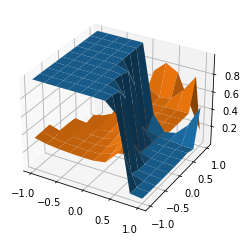

In [75]:
#para ver como cambian los robots hay que definir una funcion de aptitud/fitness
#en cada evolucion temporal, si el robot no muere su funcion de aptitud aumentara
#si el robot se bugea, tiene retraso y la aptitud disminuye con una penalidad
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(X,Y,N1)
ax.plot_surface(X,Y,N2)

In [76]:
class Robot:
    
    def __init__(self,dt,Layers,Id=0):
        
        # Time
        self.dt = dt
        self.Id = Id
        
        # Status
        self.Status = 1
        
        # Position
        self.r = np.array([0.,0.])
         
        # Velocity
        #theta = np.random.uniform(0.25*np.pi - 0.2, 0.25*np.pi + 0.2)
        theta = np.random.uniform(0.,2*np.pi)
        #theta = 0.
        V = 1.0 # parametro libre
        self.v = np.array([V*np.cos(theta),V*np.sin(theta)])
        
        # Brain
        self.SetLayers(Layers)
        
        # Fitness
        self.Steps = 0
        self.Fitness = np.inf
        
    def Evolution(self):
        
        self.r += self.dt*self.v
        
    def Reset(self):
        
        # Vuelve a la vida
        self.Status = 1
        
        # Restart Steps
        self.Steps = 0
        # No reiniciamos el fitness para comparar entre epocas
        
        
        # Vuelve al punto inicial
        self.r = np.array([0.,0.]) 
        
        # Si es buena idea
        theta = np.random.uniform(0.,2*np.pi)
        V = 1.0 # parametro libre
        self.v = np.array([V*np.cos(theta),V*np.sin(theta)])
        
        #self.v += np.random.normal(0,0.05,size=(2,)) 
        
    def CheckLimits(self,Limits):
        
        for i in range(2):
            if self.r[i] > Limits[i][1] or self.r[i] < Limits[i][0]:
                self.Status = 0  
     
    def SetLayers(self,Layers):
        self.Layers = Layers
        
    def GetLayers(self):
        return self.Layers
    
    def BrainActivation(self,x,threshold=0.8):
        
        for i in range(len(self.Layers)):
            if i == 0:
                output = self.Layers[i].Activation(x) 
            else:
                output = self.Layers[i].Activation(output)
        
        self.Activation = np.round(output,6) # Significa cambiar vx o vy
       
        # Aqui cambiamos la velocidad
        for i in range(2):
            if self.Activation[i] >= threshold:
                self.v[i] = -self.v[i]
        #       self.Steps -= 0.5 # Penalizamos el cambio de velocidad
                
        return self.Activation
     
    # No necesitamos mutar en la prueba de la red neuronal    
    def Mutate(self):
        
        for i in range(len(self.Layers)):
            self.Layers[i].Mutate()
            
    def Print(self):
        print('{} {} {} {} {} {}'.format(self.Id,self.r,self.Status,self.Steps,self.Fitness,self.Activation))

In [77]:
dt = 0.05
t = np.arange(0.,20.,dt)
Limits = np.array([[-1,1],[-1,1]])

In [78]:
def GetRobots(N):
    
    Robots = []
    
    # Creamos N robots con el grafo del entrenamiento,
    ## para ver el comportamiento con los diferentes Condiciones I
    for i in range(N):    
        r = Robot(dt,Layers,Id=i)
        Robots.append(r)
        
    return Robots

In [79]:
def Plot(t):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(221)
    
    
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])  
    
    ax.set_title('t={:.2f}'.format(t))
    
    ax1 = fig.add_subplot(222)
    ax1.set_ylim(0,1)
    
    ax2 = fig.add_subplot(224)
    ax2.set_ylim(0,1)
    
    return ax,ax1,ax2

In [80]:
def TimeEvolutionPlot(Robots,t):
    
    for it in range(len(t)):
        
        clear_output(wait=True)
        
        ax,ax1,ax2 = Plot(t[it])
        
        Activationx=np.zeros(len(Robots))
        Activationy=np.zeros(len(Robots))
        
        for i,p in enumerate(Robots):
            
            p.Evolution()
            p.CheckLimits(Limits)
            
            # Activamos el cerebro
            _ = p.BrainActivation(p.r)
            
            if p.Status == 1:
                p.Steps += 1
            else:
                Robots.pop(i)
            
            ax.scatter(p.r[0],p.r[1],label='Id {} Act {}'.format(p.Id,np.round(p.Activation,2)))   
            ax.quiver(p.r[0],p.r[1],p.v[0],p.v[1])
            ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(0.5,-0.1),frameon=False, fontsize=10)
            
            Activationx[i] = p.Activation[0]
            Activationy[i] = p.Activation[1]
             
        ax1.scatter(np.arange(0,len(Robots),1),Activationx,marker='o',label='Activación Cerebral X')    
        ax1.axhline(y=0.8,color='r')
        ax1.legend(loc=1)
        ax2.scatter(np.arange(0,len(Robots),1),Activationy,marker='o',label='Activación Cerebral Y')    
        ax2.axhline(y=0.8,color='r')
        ax2.legend(loc=1)
        
        plt.show()
            
        
        time.sleep(0.001)

In [81]:
RobotsTesting = GetRobots(2)

ValueError: x and y must be the same size

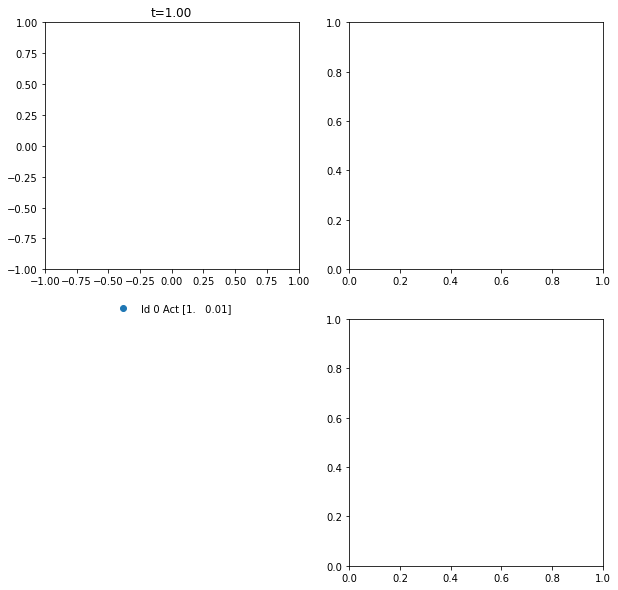

In [82]:
TimeEvolutionPlot(RobotsTesting,t)